# Import Data

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
from keras.datasets import mnist

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
from keras import backend as K
K.image_data_format()

'channels_last'

In [0]:
# 'channels_last' data format
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
input_shape = (28, 28, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# convert class vectors to binary class matrices
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create CNN Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

# Compile CNN Model

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

# Train CNN Model

In [68]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 168us/step - loss: 0.3058 - acc: 0.9042 - val_loss: 0.0713 - val_acc: 0.9790
Epoch 2/20
48000/48000 [==============================] - 7s 150us/step - loss: 0.0991 - acc: 0.9710 - val_loss: 0.0531 - val_acc: 0.9849
Epoch 3/20
48000/48000 [==============================] - 7s 151us/step - loss: 0.0702 - acc: 0.9793 - val_loss: 0.0470 - val_acc: 0.9867
Epoch 4/20
48000/48000 [==============================] - 7s 151us/step - loss: 0.0569 - acc: 0.9827 - val_loss: 0.0426 - val_acc: 0.9889
Epoch 5/20
48000/48000 [==============================] - 7s 151us/step - loss: 0.0498 - acc: 0.9851 - val_loss: 0.0397 - val_acc: 0.9894
Epoch 6/20
48000/48000 [==============================] - 7s 150us/step - loss: 0.0427 - acc: 0.9873 - val_loss: 0.0385 - val_acc: 0.9897
Epoch 7/20
48000/48000 [==============================] - 7s 150us/step - loss: 0.0376 - acc: 0.9884 - val_loss: 0.0375 - 

# Evaluate CNN Model

In [69]:
model.evaluate(x_test, y_test, verbose=0)

[0.025763151499420656, 0.9918]

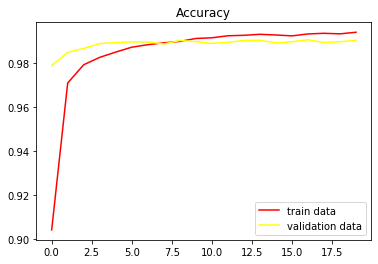

In [70]:
from matplotlib import pyplot as plt
epochs = history.epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='train data')
plt.plot(epochs, val_acc, color='yellow', label='validation data')
plt.title('Accuracy')
plt.legend()
plt.show()

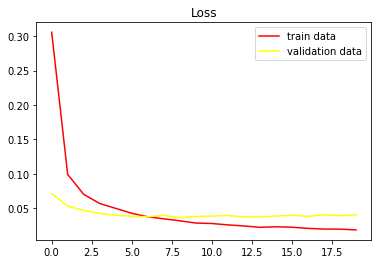

In [71]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, color='red', label='train data')
plt.plot(epochs, val_loss, color='yellow', label='validation data')
plt.title('Loss')
plt.legend()
plt.show()

# DoubledMNIST?

In [0]:
# For practise